In [1]:
from genaibook.core import get_device

device = get_device()
print(f"Using device: {device}")

/Users/jorocca/Desktop/Projects/AI Practice/Transformers-Diffusions/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: mps


In [2]:
import torch
from diffusers import StableDiffusionPipeline

'NoneType' object has no attribute 'cadam32bit_grad_fp32'


/Users/jorocca/Desktop/Projects/AI Practice/Transformers-Diffusions/.venv/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


In [3]:
pipe = StableDiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to(device)

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 11.89it/s]


100%|██████████| 50/50 [00:25<00:00,  1.92it/s]


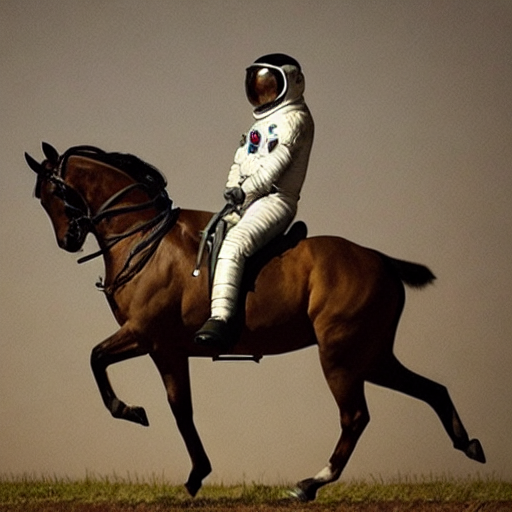

In [4]:
prompt = "a photograph of an astronaut riding a horse"
torch.manual_seed(0)
pipe(prompt).images[0]

In [1]:
from transformers import pipeline

/Users/jorocca/Desktop/Projects/AI Practice/Transformers-Diffusions/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
generator = pipeline("text-generation", device=device)

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps


In [7]:
generator("It was dark and stormy...")[0]["generated_text"]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


"It was dark and stormy...The clouds had moved on to the ocean...They were so big. I remember going to the beach and watching the wave...I couldn't look at it, as a wave falls through the water…But the waves"

In [8]:
classifier = pipeline("text-classification", device=device)
classifier("This is disgustingly delicious")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps


[{'label': 'POSITIVE', 'score': 0.9998133778572083}]

In [3]:
music_pipe = pipeline('text-to-audio', model='facebook/musicgen-small')
data = music_pipe('electric rock solo, very intense')
print(data)

/Users/jorocca/Desktop/Projects/AI Practice/Transformers-Diffusions/.venv/lib/python3.10/site-packages/transformers/models/encodec/modeling_encodec.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)
Config of the text_encoder: <class 'transformers.models.t5.modeling_t5.T5EncoderModel'> is overwritten by shared text_encoder config: T5Config {
  "_name_or_path": "t5-base",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer

{'audio': array([[[0.08207578, 0.07605827, 0.08279791, ..., 0.01022064,
         0.00797695, 0.00805949]]], dtype=float32), 'sampling_rate': 32000}


In [4]:
import IPython.display as ipd
display(ipd.Audio(data["audio"][0], rate=data["sampling_rate"]))